<a href="https://colab.research.google.com/github/GarreauArthur/rgbspace/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

# The data

first download the data

In [2]:
!git clone https://github.com/GarreauArthur/rgbspace.git

Cloning into 'rgbspace'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 3), reused 5 (delta 1), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [4]:
data = pd.read_csv("./rgbspace/data.csv")
data.head()

,red,blue,green,color
0,237.0,235.0,112.0,0.0
1,3.0,46.0,70.0,3.0
2,139.0,197.0,7.0,1.0
3,139.0,100.0,108.0,5.0
4,218.0,130.0,28.0,0.0


The data is made of 4 column, one for each color RGB, and one giving the label of the color:

* 0 is red
* 1 is yellow
* 2 is green
* 3 is cyan
* 4 is blue
* 5 is magenta

Let's extract the data, and normalize the inputs

In [5]:
color = data.loc[:, 'color']
rgb = data.loc[:, :'green']
normalized_rgb = (rgb-128)/255
normalized_rgb.head()

,red,blue,green
0,0.427451,0.419608,-0.062745
1,-0.490196,-0.321569,-0.227451
2,0.043137,0.270588,-0.474510
3,0.043137,-0.109804,-0.078431
4,0.352941,0.007843,-0.392157


Let's try to visualize the data

(0, 50, -100, 10)

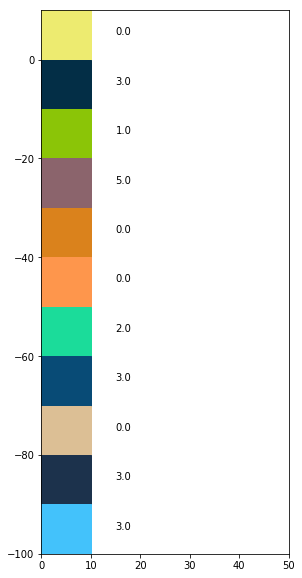

In [55]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, aspect='equal')
for i in range(0,11):
  pixel = rgb.loc[i, :].values/255
  rec = patches.Rectangle((0, -i*10), 10, 10, color=pixel)
  ax.add_patch(rec)
  ax.text(15, -i*10 + 5, color.loc[i])
  
plt.axis((0,50,-100,10))

In [34]:
print(rgb.loc[1, :].values/255)

[0.01176471 0.18039216 0.2745098 ]


Let's define the size of our data sets

In [6]:
total_number_of_examples = rgb['red'].count()

m_train_int = int(total_number_of_examples*0.8)
m_dev_int = int(total_number_of_examples*0.1)
m_test_int = int(total_number_of_examples*0.1)


m_train = np.float64(m_train_int)
m_dev   = np.float64(m_dev_int)
m_test  = np.float64(m_test_int)
print(m_train, m_test, m_dev)

8000.0 1000.0 1000.0


Now, we prepare the datasets

In [21]:
# split the dataset in 3
x_train = normalized_rgb.loc[:(m_train-1), 'red':'green'].values
x_dev = normalized_rgb.loc[m_train:(m_train+m_dev-1), 'red':'green'].values
x_test = normalized_rgb.loc[(m_train+m_dev):, 'red':'green'].values
# shape (number of feature, number of example

# transform the color (output) into a one hot vector
nb_classes = 6
Y = color.astype('int64').values.reshape(-1)
one_hot = np.eye(nb_classes)[Y]
one_hot = one_hot.reshape(10000, 6)

y_train = one_hot[:(m_train_int), :]
y_dev = one_hot[m_train_int:(m_train_int+m_dev_int), :]
y_test = one_hot[(m_train_int+m_dev_int):, :]
print(y_train.shape)

(8000, 6)


Let's build a tensorflow 2 model

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

Train



In [23]:
model.fit(x_train, y_train, epochs=20, batch_size=32)

Train on 8000 samples
Epoch 1/20
8000/8000 [==============================] - 1s 89us/sample - loss: 1.6838 - accuracy: 0.2747
Epoch 2/20
8000/8000 [==============================] - 1s 76us/sample - loss: 1.2912 - accuracy: 0.5599
Epoch 3/20
8000/8000 [==============================] - 1s 72us/sample - loss: 0.8836 - accuracy: 0.7980
Epoch 4/20
8000/8000 [==============================] - 1s 74us/sample - loss: 0.5864 - accuracy: 0.8931
Epoch 5/20
8000/8000 [==============================] - 1s 70us/sample - loss: 0.4378 - accuracy: 0.9329
Epoch 6/20
8000/8000 [==============================] - 1s 69us/sample - loss: 0.3563 - accuracy: 0.9479
Epoch 7/20
8000/8000 [==============================] - 1s 75us/sample - loss: 0.3049 - accuracy: 0.9561
Epoch 8/20
8000/8000 [==============================] - 1s 73us/sample - loss: 0.2692 - accuracy: 0.9603
Epoch 9/20
8000/8000 [==============================] - 1s 74us/sample - loss: 0.2434 - accuracy: 0.9643
Epoch 10/20
8000/8000 [==========

In [24]:
model.evaluate(x_test, y_test)

1000/1000 [==============================] - 0s 72us/sample - loss: 0.1300 - accuracy: 0.9770


[0.13001251649856568, 0.977]

In [28]:
data_pred = np.array([[255,1,1], [1, 255, 1], [1, 1, 255], [237,	235, 112]])
print(model.predict(data_pred))

[[0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
